### Importar librerías

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

import os

RANDOM_STATE = 0

In [42]:
# Importa el dataset
# data_feat = 'features_kepler_train.csv'
data_feat = 'features_tess_train.csv'
data = pd.read_csv(os.path.join('..', 'data', data_feat))

In [43]:
# Muestra las 10 instancias aleatorias
data.sample(10)

,mission,koi_id,koi_name,koi_time0bk,koi_period,koi_duration,koi_is_planet
0,TESS,50365310,1000.01,2.459230e+06,2.171348,0.084051,0
1360,TESS,219189765,737.01,2.458544e+06,1.731851,0.068605,1
1141,TESS,455096220,489.01,2.459251e+06,3.646661,0.163438,1
593,TESS,335996558,2027.01,2.458740e+06,1.463290,0.101292,0
418,TESS,459903429,1671.01,2.458821e+06,8.136640,0.086833,0
1471,TESS,133654092,975.01,2.458493e+06,1.973530,0.090375,0
1362,TESS,437242640,744.01,2.459285e+06,4.317685,0.087542,1
277,TESS,199376584,1456.01,2.459441e+06,18.712192,0.251125,1
760,TESS,220479565,269.01,2.458382e+06,3.697724,0.038284,1
390,TESS,470852531,1625.01,2.458766e+06,1.494460,0.088083,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mission        1489 non-null   object 
 1   koi_id         1489 non-null   int64  
 2   koi_name       1489 non-null   float64
 3   koi_time0bk    1489 non-null   float64
 4   koi_period     1473 non-null   float64
 5   koi_duration   1489 non-null   float64
 6   koi_is_planet  1489 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 81.6+ KB


In [45]:
# En valores absolutos
data['koi_is_planet'].value_counts()

0    848
1    641
Name: koi_is_planet, dtype: int64

In [46]:
# En proporción
data['koi_is_planet'].value_counts(normalize=True)

0    0.56951
1    0.43049
Name: koi_is_planet, dtype: float64

In [47]:
data.describe()

,koi_id,koi_name,koi_time0bk,koi_period,koi_duration,koi_is_planet
count,1.489000e+03,1489.000000,1.489000e+03,1473.000000,1489.000000,1489.000000
mean,2.371755e+08,1833.825124,2.458956e+06,6.512729,0.122192,0.430490
std,1.739115e+08,1441.735848,3.891502e+02,21.857191,0.063015,0.495311
min,1.003831e+06,101.010000,2.458325e+06,0.247668,0.008836,0.000000
25%,1.190811e+08,718.010000,2.458655e+06,1.764420,0.078917,0.000000
50%,2.348253e+08,1417.010000,2.458956e+06,3.332623,0.110167,0.000000
75%,3.436481e+08,2403.010000,2.459303e+06,6.269716,0.149370,1.000000
max,2.041563e+09,5535.010000,2.459661e+06,736.560149,0.543405,1.000000


In [48]:
# Haz el reemplazo
columns_to_replace = ['koi_id', 'koi_time0bk', 'koi_period', 'koi_duration']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.NaN)

In [49]:
# Recuento de nulos
data.isnull().sum()

mission           0
koi_id            0
koi_name          0
koi_time0bk       0
koi_period       16
koi_duration      0
koi_is_planet     0
dtype: int64

In [50]:
# Imputa los valores
data = data.fillna(data.median())

C:\Users\bisqu\AppData\Local\Temp/ipykernel_2880/2486533195.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [51]:
# Recuento de nulos
data.isnull().sum()

mission          0
koi_id           0
koi_name         0
koi_time0bk      0
koi_period       0
koi_duration     0
koi_is_planet    0
dtype: int64

In [52]:
# Muestra un nuevo resumen estadístico para comprobar que está todo ok
data.describe()

,koi_id,koi_name,koi_time0bk,koi_period,koi_duration,koi_is_planet
count,1.489000e+03,1489.000000,1.489000e+03,1489.000000,1489.000000,1489.000000
mean,2.371755e+08,1833.825124,2.458956e+06,6.478557,0.122192,0.430490
std,1.739115e+08,1441.735848,3.891502e+02,21.741835,0.063015,0.495311
min,1.003831e+06,101.010000,2.458325e+06,0.247668,0.008836,0.000000
25%,1.190811e+08,718.010000,2.458655e+06,1.776539,0.078917,0.000000
50%,2.348253e+08,1417.010000,2.458956e+06,3.332623,0.110167,0.000000
75%,3.436481e+08,2403.010000,2.459303e+06,6.203622,0.149370,1.000000
max,2.041563e+09,5535.010000,2.459661e+06,736.560149,0.543405,1.000000


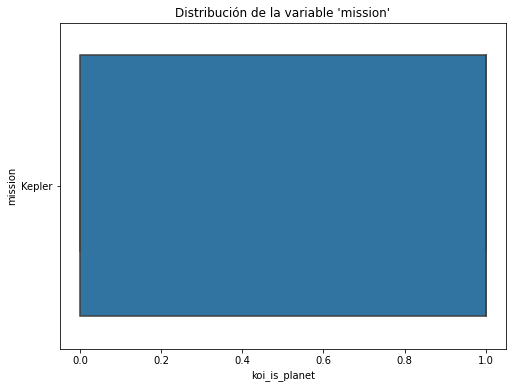

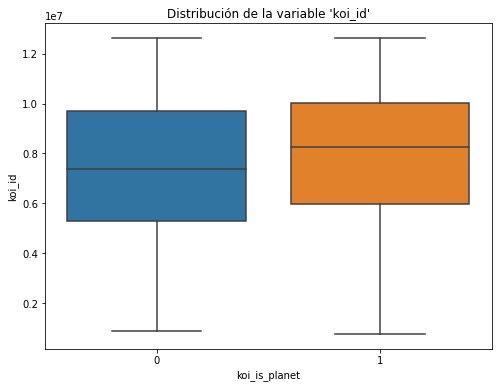

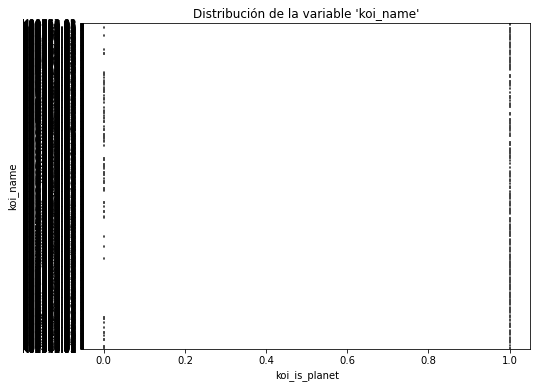

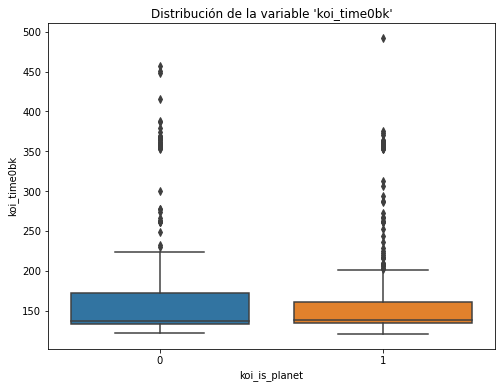

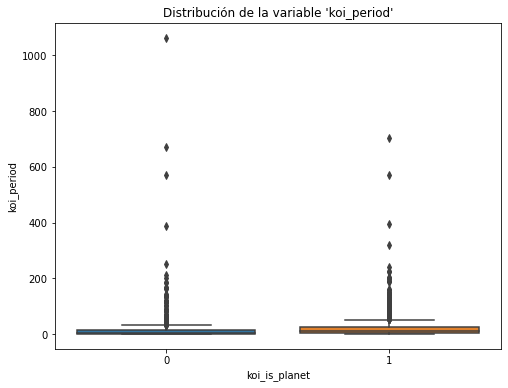

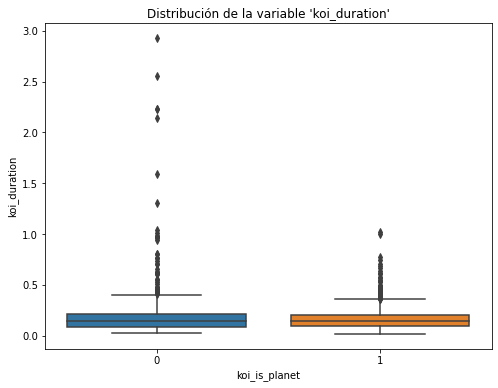

In [13]:
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='koi_is_planet', y=column, data=data)
    plt.xlabel('koi_is_planet')
    plt.title(f"Distribución de la variable '{column}'");

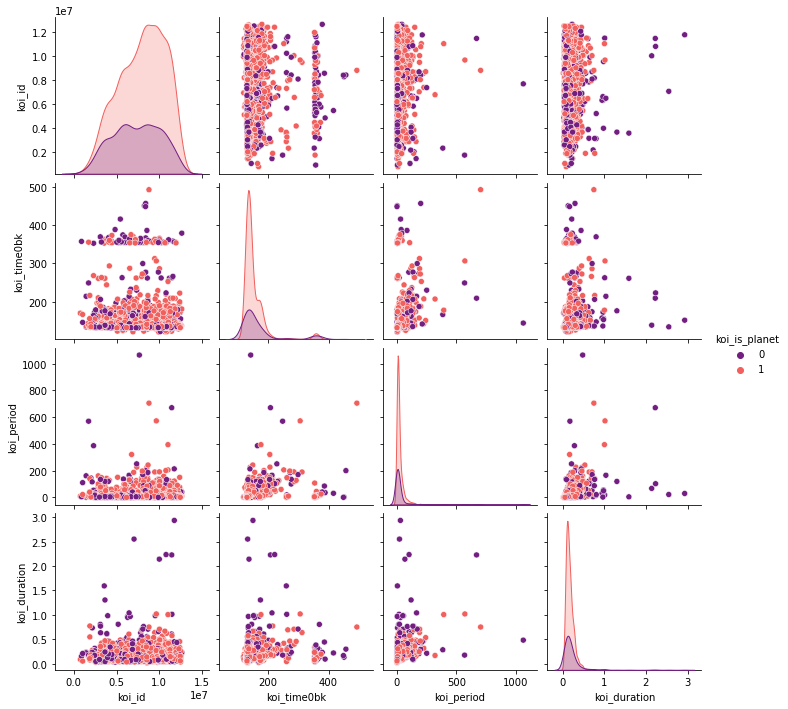

In [14]:
sns.pairplot(data, hue='koi_is_planet', palette='magma');

In [53]:
data = pd.get_dummies(data, drop_first=True)
data

,koi_id,koi_name,koi_time0bk,koi_period,koi_duration,koi_is_planet
0,50365310,1000.01,2.459230e+06,2.171348,0.084051,0
1,124709665,1002.01,2.459202e+06,1.867588,0.092161,0
2,106997505,1003.01,2.458493e+06,2.743230,0.131958,0
3,238597883,1004.01,2.459230e+06,3.577575,0.122280,0
4,169904935,1005.01,2.458493e+06,4.550720,0.108292,0
...,...,...,...,...,...,...
1484,317951248,995.01,2.458494e+06,3.443800,0.107167,0
1485,142918609,996.01,2.458495e+06,14.537800,0.284417,0
1486,341729521,997.01,2.459230e+06,8.413486,0.148201,0
1487,54390047,998.01,2.459230e+06,0.941436,0.056696,0


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

KeyboardInterrupt: 

In [81]:
X = data.drop(['koi_id', 'koi_name', 'koi_is_planet'], axis=1)
y = data['koi_is_planet']

In [82]:
X.head()

,koi_time0bk,koi_period,koi_duration
0,2.459230e+06,2.171348,0.084051
1,2.459202e+06,1.867588,0.092161
2,2.458493e+06,2.743230,0.131958
3,2.459230e+06,3.577575,0.122280
4,2.458493e+06,4.550720,0.108292


**Divide el dataset en los conjuntos de entrenamiento y prueba en una proporción de 75/25. Usa `RANDOM_STATE` y estratifica la división en función de la variable de salida.**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

**Normaliza los datos de entrenamiento y prueba usando la función `StandardScaler()` de la librería Scikit-Learn.**

In [84]:
# Escala el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [85]:
# Recrea el dataset de entrenamiento con las columnas estandarizadas
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train.head()

,koi_time0bk,koi_period,koi_duration
0,1.513653,-0.007092,0.115714
1,0.280275,-0.240993,-0.962142
2,-0.567385,0.452915,2.972965
3,-0.471483,-0.165499,0.185628
4,-0.403864,-0.199352,-0.709193


In [86]:
# Escala el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

In [87]:
# Recrea el dataset de prueba con las columnas estandarizadas
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test.head()

,koi_time0bk,koi_period,koi_duration
0,-0.339235,-0.201565,-0.495403
1,0.755866,-0.190070,-1.072232
2,0.898840,-0.130690,-0.318046
3,0.015790,-0.075528,2.789138
4,-0.388395,0.889307,1.028025


**RANDOM_STATE**

In [88]:
lr_params = {'C': [1, 10, 100],
             'max_iter': [200, 500, 1000]}

In [89]:
# Optimiza el clasificador
lr_gs = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), 
                     lr_params,
                     cv=3).fit(X_train, y_train)

In [90]:
# Muestra los mejores parámetros
lr_gs.best_params_

{'C': 1, 'max_iter': 200}

In [91]:
# Entrena el clasificador con los parámetros óptimos
lr_tuned = LogisticRegression(**lr_gs.best_params_, random_state=RANDOM_STATE)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, random_state=0)

In [92]:
print(f'Test accuracy - {round(lr_tuned.score(X_test, y_test) * 100, 2)}%')

Test accuracy - 71.85%


In [93]:
y_pred = lr_tuned.predict(X_test)

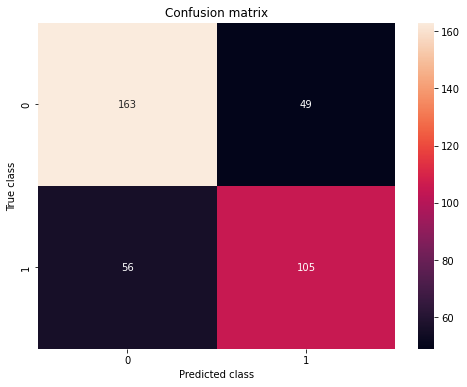

In [94]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [95]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       212
           1       0.68      0.65      0.67       161

    accuracy                           0.72       373
   macro avg       0.71      0.71      0.71       373
weighted avg       0.72      0.72      0.72       373



**RANDOM FOREST**

In [96]:
rf_params = {'n_estimators' :[100, 200, 500, 1000],
             'max_depth': [3, 5, 8, 10]}

In [97]:
# Optimiza el clasificador
rf_gs = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), 
                     rf_params,
                     cv=3).fit(X_train, y_train)

In [98]:
# Muestra los mejores parámetros
rf_gs.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [99]:
# Entrena el clasificador con los parámetros óptimos
rf_tuned = RandomForestClassifier(**rf_gs.best_params_, random_state=RANDOM_STATE)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)

In [100]:
print(f'Test accuracy - {round(rf_tuned.score(X_test, y_test) * 100, 2)}%')

Test accuracy - 72.65%


In [101]:
y_pred = rf_tuned.predict(X_test)

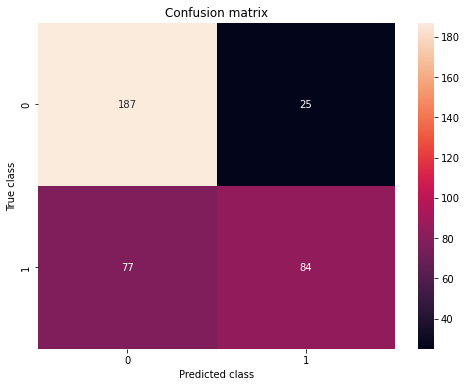

In [102]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [103]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       212
           1       0.77      0.52      0.62       161

    accuracy                           0.73       373
   macro avg       0.74      0.70      0.70       373
weighted avg       0.74      0.73      0.72       373



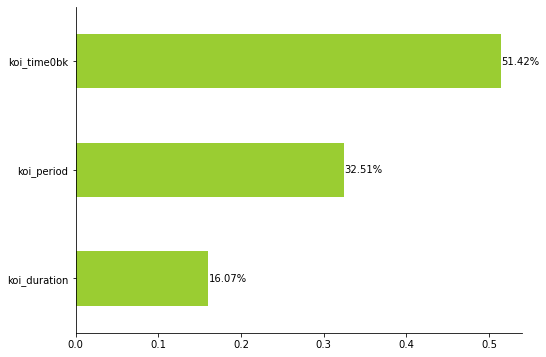

In [104]:
# Muestra la importancia de las características
feat_importances = pd.DataFrame(rf_tuned.feature_importances_,
                                index=X.columns,
                                columns=['Importance'])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)

ax = feat_importances[feat_importances['Importance'] > 0].plot(kind='barh',
                                                               figsize=(8, 6),
                                                               color='yellowgreen')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()

for p in ax.patches:
    width = p.get_width()
    plt.text(width,
             p.get_y() + 0.5 * p.get_height(),
             '{:1.2f}%'.format(width * 100),
             ha='left',
             va='center')

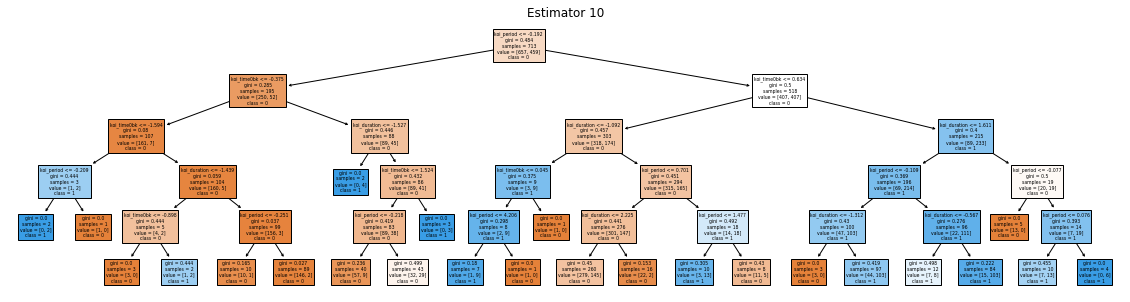

In [105]:
estimator = 10
plt.figure(figsize=(20, rf_tuned.estimators_[estimator].get_depth() * 1))
plot_tree(rf_tuned.estimators_[estimator],
               feature_names=X.columns,
               class_names=['0', '1'],
               filled=True)

plt.title('Estimator ' + str(estimator), fontsize=12)

plt.savefig(f'rf_individualtree_{estimator}.png', dpi=300)

In [106]:
# Crea un informe de texto que muestra las reglas del árbol de decisión
print(export_text(rf_tuned.estimators_[estimator], feature_names=list(X.columns)))

|--- koi_period <= -0.19
|   |--- koi_time0bk <= -0.37
|   |   |--- koi_time0bk <= -1.59
|   |   |   |--- koi_period <= -0.21
|   |   |   |   |--- class: 1.0
|   |   |   |--- koi_period >  -0.21
|   |   |   |   |--- class: 0.0
|   |   |--- koi_time0bk >  -1.59
|   |   |   |--- koi_duration <= -1.44
|   |   |   |   |--- koi_time0bk <= -0.90
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- koi_time0bk >  -0.90
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- koi_duration >  -1.44
|   |   |   |   |--- koi_period <= -0.25
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- koi_period >  -0.25
|   |   |   |   |   |--- class: 0.0
|   |--- koi_time0bk >  -0.37
|   |   |--- koi_duration <= -1.53
|   |   |   |--- class: 1.0
|   |   |--- koi_duration >  -1.53
|   |   |   |--- koi_time0bk <= 1.52
|   |   |   |   |--- koi_period <= -0.22
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- koi_period >  -0.22
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- koi_time0bk >  

In [107]:
# Calcula las probabilidades de predicción
y_proba_rf = rf_tuned.predict_proba(X_test)

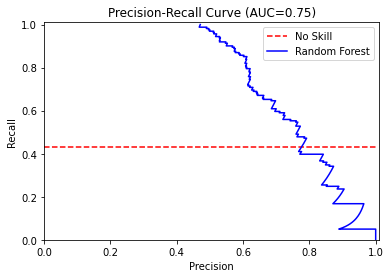

In [108]:
# Probamos usando las probabilidades del clasificador random forest
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf[:, 1])
pr_auc = auc(recall, precision)

# Calculamos el codo de la curva
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

# Establecemos el tamaño de los ejes
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

# Dibujamos la línea del clasificador aleatorio
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', c='r')
# Dibujamos la curva de precisión-sensibilidad del clasificador
plt.plot(precision, recall, label='Random Forest', c='b')

plt.title(f'Precision-Recall Curve (AUC={pr_auc:.2f})')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend();

In [119]:
# Importa el dataset
# data_feat = 'features_kepler_test.csv'
data_feat = 'features_tess_test.csv'
k_test = pd.read_csv(os.path.join('..', 'data', data_feat))
k_test_pred = k_test.drop(['mission', 'koi_id', 'koi_name'], axis=1)
columns_to_replace = ['koi_time0bk', 'koi_period', 'koi_duration']
k_test_pred[columns_to_replace] = k_test_pred[columns_to_replace].replace(0, np.NaN)

In [120]:
y_pred = scaler.transform(k_test_pred)
y_pred_lr = lr_tuned.predict(y_pred)
y_pred_lr.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = rf_tuned.predict(k_test_pred)
y_pred.head()